In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
rs = np.zeros(len(mousenums))
variances = np.zeros(8)
mses = np.zeros(len(mousenums))
errs = np.zeros(8)
for i, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    
    indtr, indte = getinterleavedinds(450, 75, calc.shape[0])
    threat = epmthreat(track['mouse_positionMS'], behav)
    calctr = calc[indtr]
    calcte = calc[indte]
    threattr = threat[indtr]
    threatte = threat[indte]
    
    lr = LR()
    lr.fit(calctr, threattr)
    pthreat = np.clip(lr.predict(calcte), -1, 1)

    r = pearsonr(pthreat, threatte)[0]
    rs[i] = r
    
    
    mse = np.mean((pthreat - threatte)**2)
    print(np.mean((lr.predict(calctr) - threattr)**2), mse)
    mses[i] = mse
    variances[i] = np.var(threatte)
    
    errs[i] = np.mean((threatte - np.mean(threattr))**2)

0.03828117438663771 0.08745147419231064
0.022445824446193682 0.07140106132695383
0.03784044564221072 0.14140460969533541
0.04799310830548171 0.15716406841327787
0.023100481601859492 0.09205726802154336
0.06150028501450258 0.2732756504954974
0.02646640529064826 0.1105229709131878
0.026443960101807516 0.09790186122669634


In [3]:
rs

array([0.82475838, 0.86837362, 0.68479761, 0.72878676, 0.82166618,
       0.49184341, 0.7163174 , 0.72063404])

In [4]:
ttest_1samp(rs, 0)

Ttest_1sampResult(statistic=17.726439696142013, pvalue=4.483829685612099e-07)

In [5]:
d = {}
d['rs'] = rs
d['rmse'] = np.sqrt(mses[0])

In [6]:
mouse = '355'
track, neur, behav = getdicts(foldnames, mouse, 'epm')
calc = getcalc(foldnames, mouse, 'epm')
calc = zscore(calc)

indtr, indte = getinterleavedinds(450, 75, calc.shape[0])
threat = epmthreat(track['mouse_positionMS'], behav)
calctr = calc[indtr]
calcte = calc[indte]
threattr = threat[indtr]
threatte = threat[indte]

lr = LR()
lr.fit(calctr, threattr)
pthreat = np.clip(lr.predict(calcte), -1, 1)

r = pearsonr(pthreat, threatte)[0]

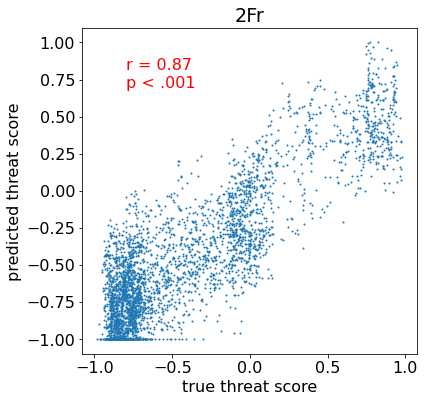

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(threatte, pthreat, s=1)

plt.xlabel('true threat score')
plt.ylabel('predicted threat score')
plt.text(-0.8, 0.7, 'r = {}\np < .001'.format(np.round(r, 2)), color='r')
plt.title('2Fr')

plt.savefig('./elife_figs/2Fr.svg')

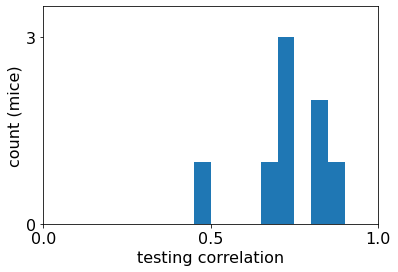

In [8]:
plt.hist(rs, bins=np.linspace(0, 1, 21))
plt.xlim(0, 1)
plt.xticks([0, 0.5, 1])
plt.ylim(0, 3.5)
plt.yticks([0, 3])
plt.ylabel('count (mice)')
plt.xlabel('testing correlation')

plt.savefig('./elife_figs/2s1.svg')